<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe11-BellmanFord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del camino más corto 

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

**Salida**: La distancia más corta $dist(s,v)$ para cada vértice $v\in V$, o una declaración indicando que $G$ contiene un ciclo negativo.


# 2. Algoritmo de Bellman-Ford

## 2.1 Código

### Funciones auxiliares

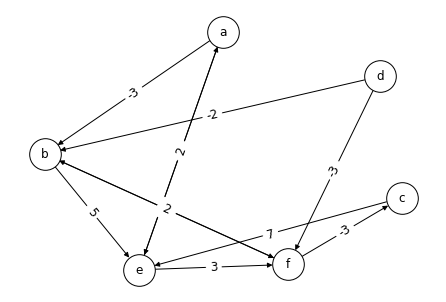

In [74]:
import matplotlib.pyplot as plt
import networkx as nx
import string
import random

def graph_instance_creator(n):
  graph = nx.gnp_random_graph(n, 0.33, 1, True)

  mapping = dict(zip(graph, string.ascii_lowercase))
  graph = nx.relabel_nodes(graph, mapping)

  weighted_edges = list()

  for e in graph.edges():
    weight = random.randint(-3, 9)
    weighted_edges.append((e[0], e[1], weight))

  return create_graph(weighted_edges)

def create_graph(edges):
  graph = nx.DiGraph()
  graph.add_weighted_edges_from(edges)
  
  distances = dict()
  predecessors = dict()

  for n in graph.nodes():
    distances[n] = None
    predecessors[n] = None

  nx.set_node_attributes(graph, distances, 'distance')
  nx.set_node_attributes(graph, predecessors, 'predecessor')

  return graph

def draw_graph(G):
  weights = nx.get_edge_attributes(G, 'weight')

  pos = nx.spring_layout(G, k=4, seed=1)
  nx.draw(G, pos, with_labels=True, font_size=12, node_size=1000,
          node_color='white', edgecolors='black')
  
  nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=12)

  plt.show()
  plt.close()

G = graph_instance_creator(6)
draw_graph(G)

### Bellman-Ford

{'s': 0, 't': 2, 'y': 7, 'x': 4, 'z': -2}


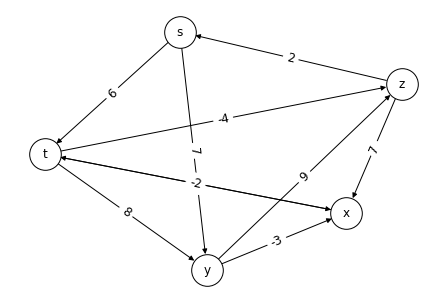

In [60]:
from termcolor import colored
from math import inf

def bellman_ford(G, s, verbose=False):
  for n in G.nodes():
    # Inicializamos la distancia de 's' a cada nodo 'v' como infinito
    G.nodes[n]['distance'] = inf

  # Inicializamos el nodo de partida con distancia cero
  G.nodes[s]['distance'] = 0

  if verbose:
    print(f"Inicializando nodo {colored(s, 'magenta')} con distancia 0")
    print(f"Inicializando resto de nodos con distancia infinita")

  # Se recorren los arcos del grafo n-1 veces
  for i in range(len(G.nodes())-1):
    changed = False # Revisa si hubo cambios en la iteración actual

    if verbose:
      print(f"\nIteración {i+1}:\n")

    for e in G.edges():
      u, v = e[0], e[1]

      distance_u = G.nodes[u]['distance'] # Mínima distancia de 's' hasta 'u'
      distance_v = G.nodes[v]['distance'] # Miníma distancia de 's' hasta 'v'
      weight = G[u][v]['weight'] # Distancia de 'u' hasta 'v'

      distance_v2 = distance_u + weight # Se calcula la nueva distancia a 'v'

      if verbose:
        print(f"Calculando distancia al nodo {colored(v, 'magenta')} ", end='')
        print(f"con nodo predecesor {colored(u, 'blue')}: ", end='')
        print(f"{distance_u} + {weight} = {colored(distance_v2, 'green')}")

      # Si la distancia calculada es menor se actualiza
      if distance_v2 < distance_v:
        G.nodes[v]['distance'] = distance_v2
        G.nodes[v]['predecessor'] = u
        changed = True

        if verbose:
          print(f"Distancia ({colored(distance_v2, 'green')}) es menor ", end='')
          print(f"a la actual ({distance_v}). Actualizando...")

      else:
        if verbose:
          print(f"Distancia ({colored(distance_v2, 'green')}) es mayor ", end='')
          print(f"a la actual ({distance_v})")

    # Si no hubo cambios en la última iteración, rompemos el ciclo
    if changed == False: 
      if verbose:
        print(f"\nNo hubo cambios en la última iteración. Rompiendo ciclo...\n")
      break

  if changed == True:
    if verbose:
      print(f"\nIterando una última vez para detectar ciclos negativos...\n")

    # Se vuelven a recorrer los arcos para revisar si existen ciclos negativos
    for e in G.edges():
      u, v = e[0], e[1]

      distance_u = G.nodes[u]['distance'] # Mínima distancia de 's' hasta 'u'
      distance_v = G.nodes[v]['distance'] # Miníma distancia de 's' hasta 'v'
      weight = G[u][v]['weight'] # Distancia de 'u' hasta 'v'

      if (distance_u + weight) < distance_v:
        if verbose:
          print(f"Ciclo negativo detectado.")
          print(f"Salida: False")

        return False # Existe un ciclo negativo

  distances = nx.get_node_attributes(G, 'distance')

  if verbose:
    print(f"Distancias obtenidas: ")
    print(', '.join('{}: {}'.format(node, distance) for node, distance 
              in sorted(distances.items())))

  return distances

edges = [
  ('s', 't', 6),
  ('s', 'y', 7),
  ('t', 'x', 5),
  ('t', 'y', 8),
  ('t', 'z', -4),
  ('x', 't', -2),
  ('y', 'x', -3),
  ('y', 'z', 9),
  ('z', 's', 2),
  ('z', 'x', 7)
]

G = create_graph(edges)
distances = bellman_ford(G, 's')
print(distances)
draw_graph(G)

## 2.2. Descripción del algoritmo

La entrada consiste en un grafo dirigido $G$ con $n$ vértices, donde cada arco posee un peso asignado (distancia), más un nodo $s$ que corresponde al punto de partida. Si no existen ciclos negativos, el algoritmo retorna un diccionario con la distancia mínima que existe entre el nodo inicial y el resto de nodos del grafo. En caso contrario, el algoritmo retorna `False`, indicando que no fue posible calcular todas las distancias. Los pasos realizados son los siguientes:

1. Se crea un diccionario para guardar la distancia mínima de $s$ al resto de nodos, inicializando sus valores en infinito.

2. Asignamos al nodo $s$ una distancia de 0, puesto que corresponde al nodo inicial.

3. Iteramos $n-1$ veces por todos los arcos del grafo.

4. Para cada arco $(u, v)$, calculamos la distancia de $s$ a $v$ como $\text{dist}(s, v) = \text{dist}(s, u) + w(u, v)$, donde $w(u, v)$ corresponde al peso del arco $(u, v)$.

5. Si la distancia calculada en el paso anterior es menor a la actual, actualizamos su valor.

6. Al finalizar las iteraciones, realizamos una última iteración adicional para verificar que no existan ciclos negativos. Si para cualquier arco $(u, v)$ obtenemos una distancia menor a las previamente calculadas, retornamos `False`.

7. Si no existen ciclos negativos, retornamos el diccionario con las distancias obtenidas.


## 2.3 Ejemplo

Consideremos el siguiente grafo:

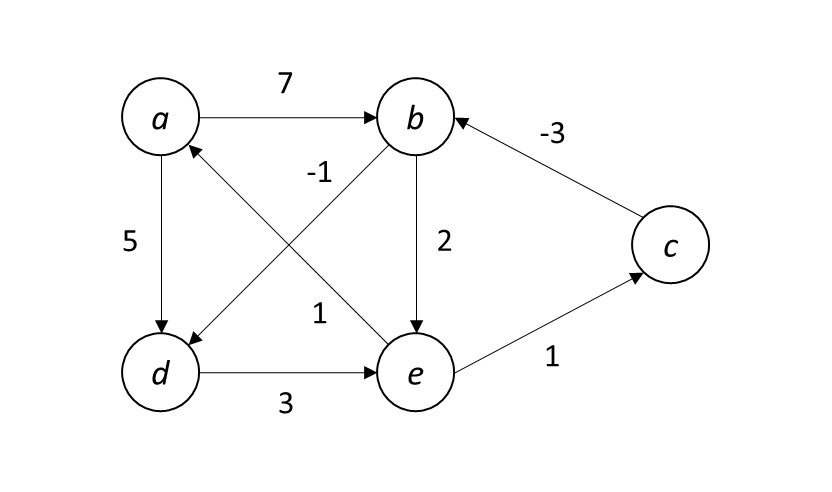

En primer lugar, inicializamos la distancia de cada vértice del grafo, considerando como punto de partida el nodo $a$:

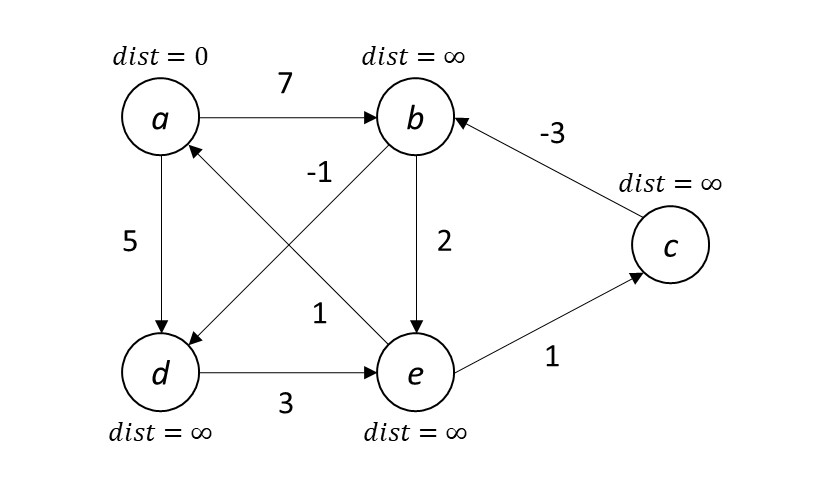

Luego, iteramos por cada uno de los arcos del grafo. Para este ejemplo, asumiremos que los arcos se recorren en orden alfabético.

Al pasar por el arco $(a, b)$, calculamos el valor de la distancia para el nodo de llegada.

$\text{dist}(a, b) = \text{dist}(a, a) + w(a, b) = 0 + 7 = 7$

Como $7 < ∞$, actualizamos el valor de la distancia. Repetimos este paso para el arco $(a, d)$

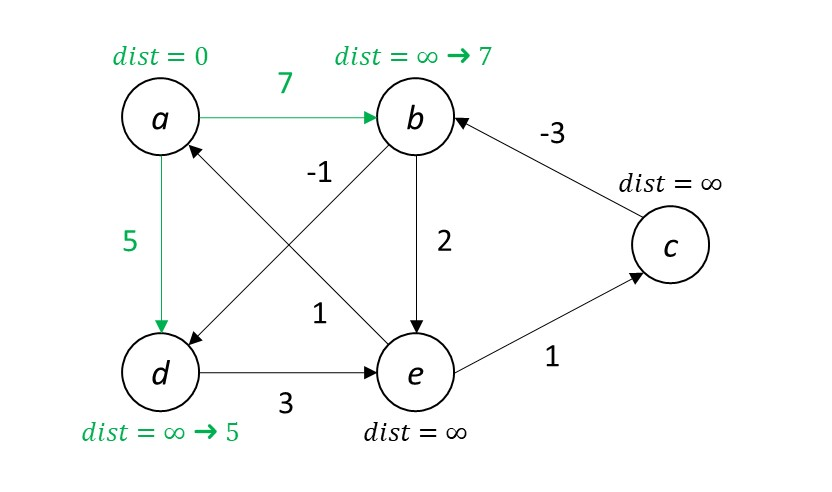

Continuamos con el arco $(b, d)$. En este caso, notamos que al calcular la distancia, obtenemos un valor mayor al previamente guardado.

$\text{dist}(b, d) = \text{dist}(a, b) + w(b, d) = 7 + (-1) = 6$

Como $5 > 6$, mantenemos el valor anterior.

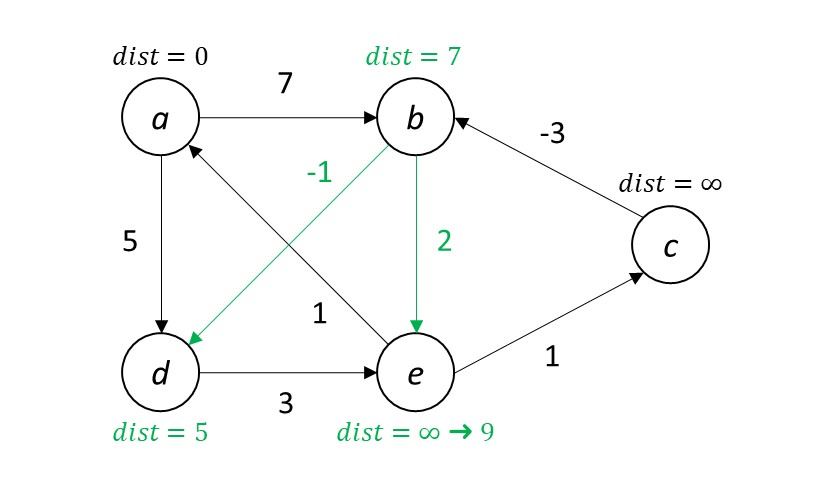

Repetimos este paso para el resto de arcos del grafo:

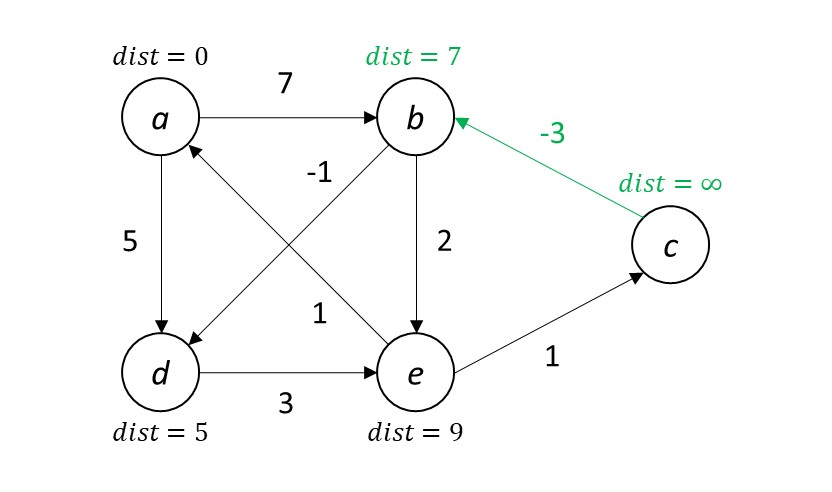

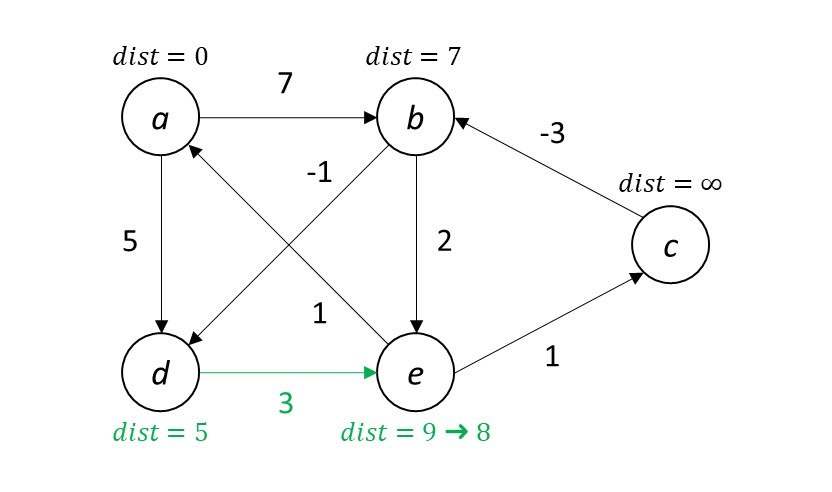

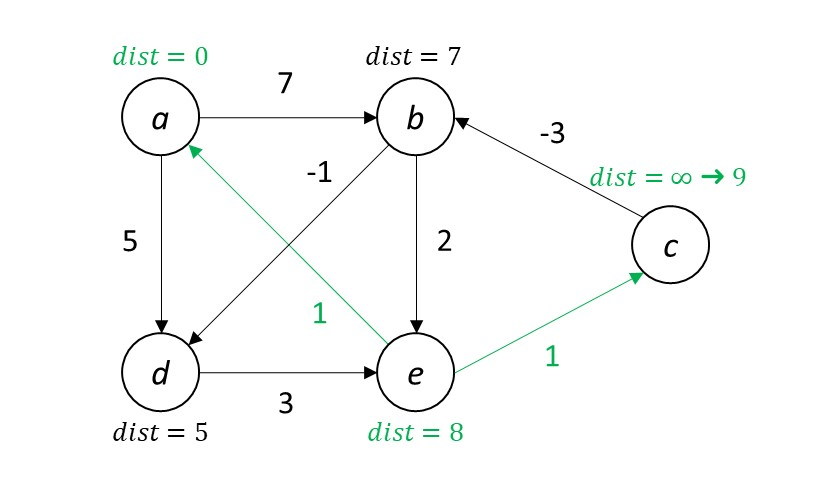

Al finalizar la primera iteración, obtenemos las siguientes distancias:

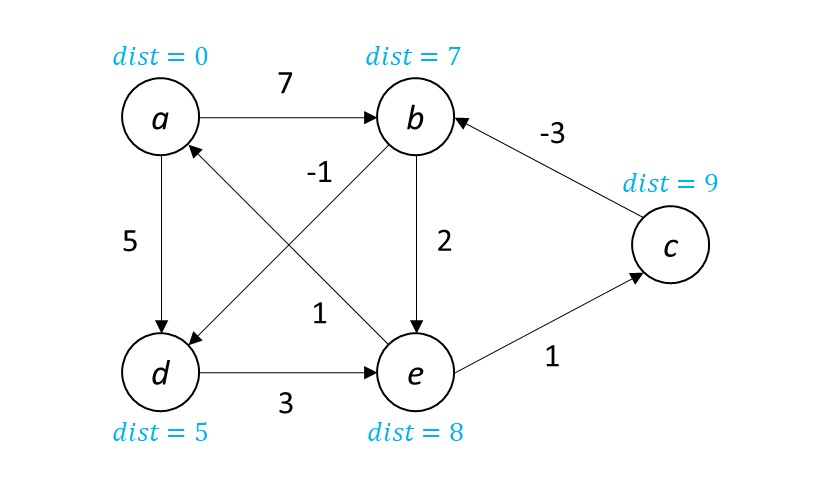

En la siguiente iteración, actualizamos los valores que sean necesarios:

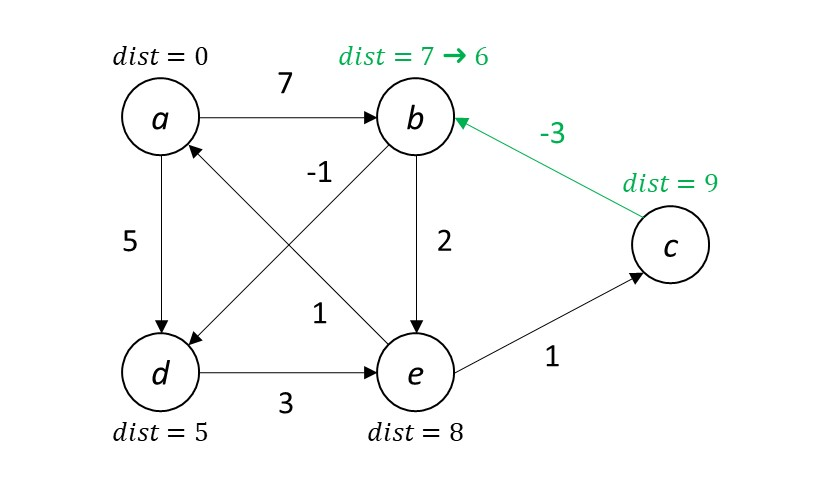

Continuamos iterando hasta completar las $n-1$ iteraciones, o convenientemente hasta que no ocurran más cambios. Finalmente, retornamos las distancias obtenidas:

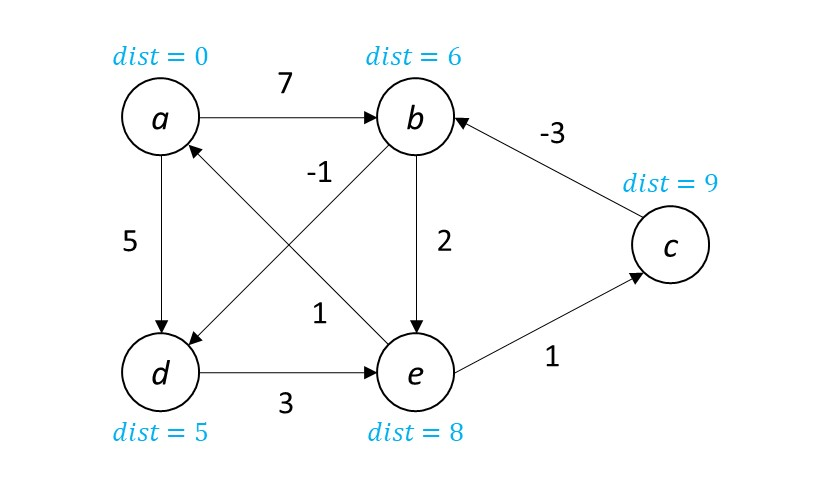

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada paso del algoritmo:

Inicializando nodo a con distancia 0
Inicializando resto de nodos con distancia infinita

Iteración 1:

Calculando distancia al nodo b con nodo predecesor a: 0 + 1 = 1
Distancia (1) es menor a la actual (inf). Actualizando...
Calculando distancia al nodo e con nodo predecesor a: 0 + -2 = -2
Distancia (-2) es menor a la actual (inf). Actualizando...
Calculando distancia al nodo a con nodo predecesor e: -2 + 7 = 5
Distancia (5) es mayor a la actual (0)
Calculando distancia al nodo d con nodo predecesor e: -2 + 3 = 1
Distancia (1) es menor a la actual (inf). Actualizando...
Calculando distancia al nodo a con nodo predecesor c: inf + 2 = inf
Distancia (inf) es mayor a la actual (0)
Calculando distancia al nodo b con nodo predecesor c: inf + 6 = inf
Distancia (inf) es mayor a la actual (1)
Calculando distancia al nodo b con nodo predecesor d: 1 + 0 = 1
Distancia (1) es mayor a la actual (1)

Iteración 2:

Calculando distancia al nodo b con nodo predecesor a: 0 + 1 = 1
Distancia (1) es mayor

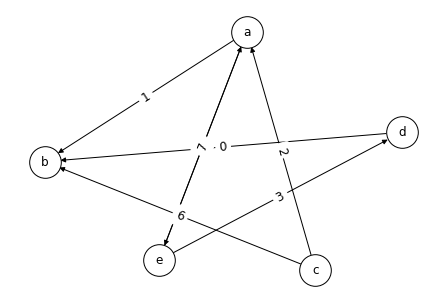

In [85]:
graph = graph_instance_creator(5)
distances = bellman_ford(graph, 'a', True)
draw_graph(graph)

# 3. Correctitud

### **Teorema 1: Correctitud del algoritmo Bellman-Ford**

*Correctitud*

## Prueba del Teorema

### Hipótesis inductiva

*Hipótesis*

### Prueba por inducción

**Caso base**

**Paso inductivo**

# 4. Tiempo de ejecución

### **Teorema 2: Tiempo de ejecución del algoritmo Bellman-Ford**

*Teorema*



# 5. Experimentos

## 5.1 Experimento 1

### Análisis de resultados

## 5.2 Experimento 2

### Análisis de resultados